                                                       0   cos_sim
22088  /Users/prafulla/Desktop/Course PDF/Summer Seme...  1.000000
9591   /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.974498
12544  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.971197
10513  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.964338
39671  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.962049
20559  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.961727
25704  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.961586
12547  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.960410
15049  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.959383
25836  /Users/prafulla/Desktop/Course PDF/Summer Seme...  0.957718
QUERY IMAGE..


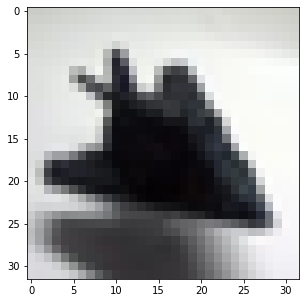

TOP 10 SEARCH RESULT


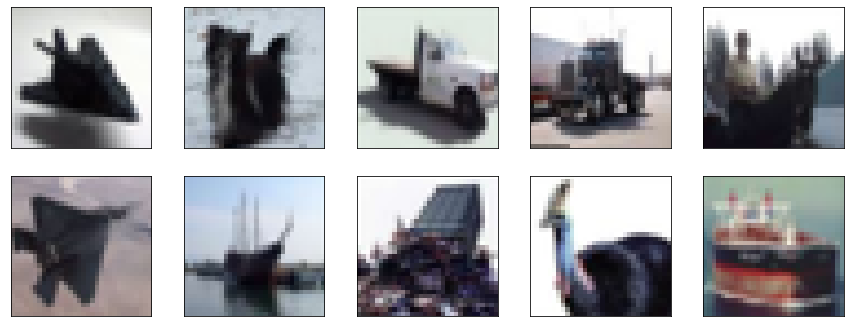

CONVERTING TO JSON..
[{"ObjectId": "", "name": "0001.png", "score": "0.9999999999999997", "color": "", "fg": ""}, {"ObjectId": "", "name": "0686.png", "score": "0.9744976354277103", "color": "", "fg": ""}, {"ObjectId": "", "name": "4484.png", "score": "0.9711969887473167", "color": "", "fg": ""}, {"ObjectId": "", "name": "1543.png", "score": "0.9643382251461194", "color": "", "fg": ""}, {"ObjectId": "", "name": "0296.png", "score": "0.9620494489668572", "color": "", "fg": ""}, {"ObjectId": "", "name": "3208.png", "score": "0.9617270549446064", "color": "", "fg": ""}, {"ObjectId": "", "name": "1221.png", "score": "0.9615856231328543", "color": "", "fg": ""}, {"ObjectId": "", "name": "2963.png", "score": "0.9604098207566627", "color": "", "fg": ""}, {"ObjectId": "", "name": "2841.png", "score": "0.9593833070008635", "color": "", "fg": ""}, {"ObjectId": "", "name": "2932.png", "score": "0.9577182994867842", "color": "", "fg": ""}]


In [10]:
from sys import argv
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import subprocess
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import sys


# parser = argparse.ArgumentParser()
# parser.add_argument("--query" , required = False)
# parser.add_argument("--dataset", required = False)
# args = parser.parse_args()

# status = False
# if args.query:
#     print("Query Image: {}".format(args.query))
#     # Parsed input data
#     query_image = args.query
#     # creating feature vector for query image and storing in csv
#     subprocess.call(['java', '-jar', 'mpegfeatures.jar', '-i', query_image])
#     status = True
    
# if args.dataset:
#     print("Dataset: {}".format(args.dataset))
#     # Parsed input data
#     dataset = args.dataset
#     # creating feature vector for dataset and storing in csv
#     subprocess.call(['java', '-jar', 'mpegfeatures.jar', '-f', dataset])
#     if status == False:
#         sys.exit(0)


# Parsed input data
# query_image = args.query
# dataset = args.dataset
# dataset = 'cifar10/cifar10/train'

# query_image = argv[1]
# query_image = 'cifar10/cifar10/train/airplane/0001.png'

# creating feature vector for dataset and storing in csv
# subprocess.call(['java', '-jar', 'mpegfeatures.jar', '-f', dataset])

# creating feature vector for query image and storing in csv
# subprocess.call(['java', '-jar', 'mpegfeatures.jar', '-i', query_image])

# Read dataset feature vectors
data_features = pd.read_csv('outputFeature.csv', header=None)
# Dropping 1st column from the dataframe
data_feature_vector = data_features.drop(columns=[0])

# Read query image feature vector
query_feature = pd.read_csv('queryFeature.csv', header=None)
# Dropping 1st column from the dataframe
query_feature_vector = query_feature.drop(columns=[0])


# cosine similarity between query image and complete dataset
cos_sim = cosine_similarity(query_feature_vector, data_feature_vector).flatten()
# Create cosine similarity values dataframe
cos_sim_df = pd.DataFrame(cos_sim, columns=['cos_sim'])

# Add cosine similarity as lasy column in data feature dataframe as ground truth
dataset = pd.concat([data_features, cos_sim_df], axis=1)

# sorting result in descending order
sort_result = dataset.sort_values(by='cos_sim', ascending=False)[[0, 'cos_sim']].head(10)
print(sort_result)

# creating top10 result csv file
# sort_result.to_csv('out_top10.csv', index=False, header=False)


# Query Image
print('QUERY IMAGE..')
query_img = Image.open(query_feature[0][0])
plt.figure(figsize=(5,5))
plt.imshow(query_img, cmap=plt.cm.binary)
plt.show()

# read the top10 result file
# top10 = pd.read_csv('out_top10.csv', header=None)


# Display result images
img_array = []
for i in sort_result.index:
    img = Image.open(sort_result[0][i])
    img_array.append(img)
    
# Top 10 Search Results
print('TOP 10 SEARCH RESULT')
plt.figure(figsize=(15,15))
for i in range(len(img_array)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_array[i], cmap=plt.cm.binary)
#     plt.xlabel(img_array[i][1])
plt.show()


# converting result to json format
json_array = []
for i in sort_result.index:
    x = {
        "ObjectId" : "",
        "name": os.path.basename(sort_result[0][i]),
        "score": os.path.basename(str(sort_result['cos_sim'][i])),
        "color": "",
        "fg" : ""
    }
    json_array.append(x)
# convert into JSON:
y = json.dumps(json_array)
print("CONVERTING TO JSON..")
print(y)